# Playing with Image Filters 

This notebok shows how to add gaussian noise to an image and then denoise it by different kinds of filters

Prof: Luigi Di Stefano, luigi.distefano@unibo.it

In [1]:
import cv2
import numpy as np
import math
from matplotlib import pyplot as plt

First we load and show the input image

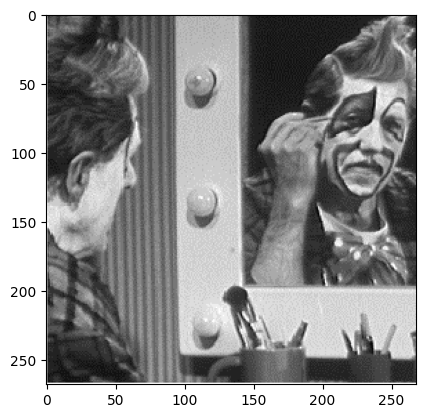

(268, 268)

In [39]:
img = cv2.imread("LabSession3Images/clown.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()
img.shape

Then we add **gaussian noise** to the input image and show the resulting noisy image: the higher is sigma_noise the noisier turns out the noisy image  

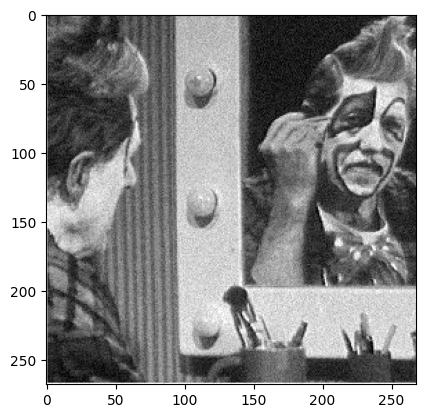

In [40]:
    row, col= img.shape
    sigma_noise=10.0
    gaussian = np.random.normal(0, sigma_noise, (row, col))
    noisy_img = img + gaussian
    noisy_img=np.clip(noisy_img, 0, 255).astype(np.uint8)
    plt.imshow(noisy_img, cmap='gray', vmin=0, vmax=255)
    plt.show()

Now we apply the first denoising fiter, i.e. the simplest one, the **Mean Filter**. The larger is kernel_size the cleaner and more blurrd turns out the denoised image. 

kernel size= 7


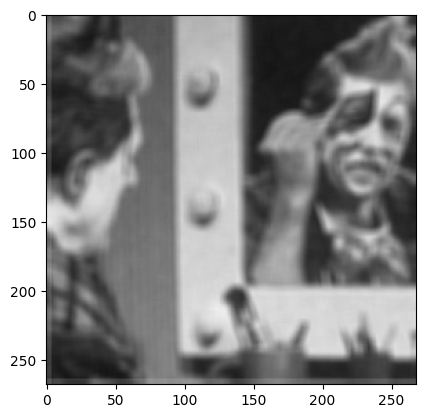

In [4]:
kernel_size=13
print("kernel size=", kernel_size)
denoised_img=cv2.blur(noisy_img, (kernel_size, kernel_size))
plt.imshow(denoised_img, cmap='gray', vmin=0, vmax=255)
plt.show()

Now we proceed with applying a **Gaussian Filter**, which, compared to a Mean Filter having the same kernel_size, casues less blur due to pixels farther wrt the center of the kernel being weighted less. Here, we set kernel_size as 2*(3*sigma)+1. 

kernel size= 13


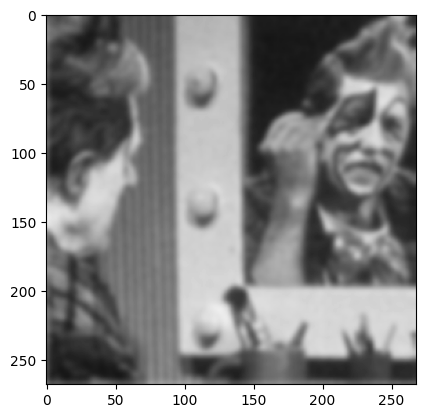

In [5]:
sigma=2
kernel_size=int(2*(3*sigma)+1)
print("kernel size=", kernel_size)
denoised_img=cv2.GaussianBlur(noisy_img, (kernel_size, kernel_size),sigma)
plt.imshow(denoised_img, cmap='gray', vmin=0, vmax=255)
plt.show()   

Finally, we apply the **Bilateral Filter**, that relies on two Gaussian Functions: one weighs pixels based on spatial proximity (sigma_space), the other based on the similarity of intensity (sigma_intensity). 

kernel size= 13
diamater= 18


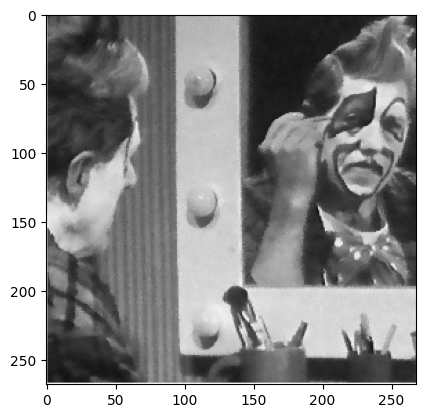

In [6]:
kernel_size=13
diameter=int(math.sqrt(2)*kernel_size)
print("kernel size=", kernel_size)
print("diamater=",diameter)
sigma_intensity = 30.0 
sigma_space = 2.0
denoised_img=cv2.bilateralFilter(noisy_img, diameter, sigma_intensity, sigma_space)
plt.imshow(denoised_img, cmap='gray', vmin=0, vmax=255)
plt.show()

In [9]:
def add_sp_noise(image, noise_ratio):
    noisy_image = np.copy(image)

    num_noisy_pixels = int(image.size * noise_ratio)

    # Randomly choose pixel indices for salt and pepper noise.
    coords = [np.random.randint(0, i, num_noisy_pixels) for i in image.shape[:2]]

    # Assign half to white (salt) and half to black (pepper).
    noisy_image[coords[0][:num_noisy_pixels // 2], coords[1][:num_noisy_pixels // 2]] = 255
    noisy_image[coords[0][num_noisy_pixels // 2:], coords[1][num_noisy_pixels // 2:]] = 0

    return noisy_image

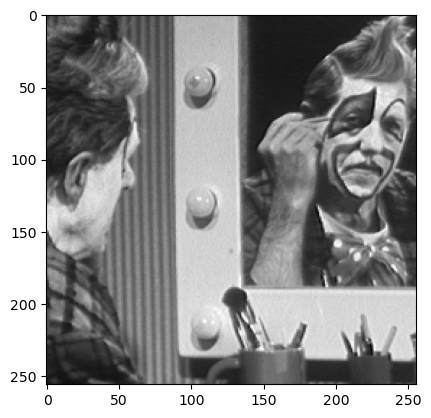

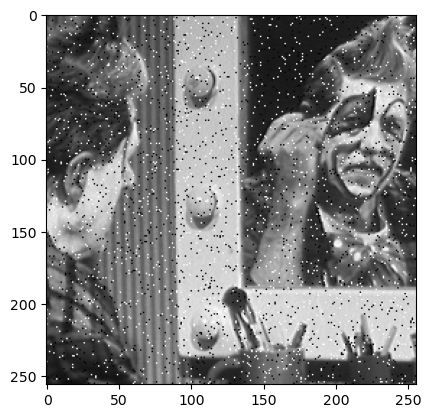

In [10]:
img = cv2.imread("LabSession3Images/clown.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()
img.shape
sp_noisy_img = add_sp_noise(img, 0.05)# Corrupt 5% of the pixels.
plt.imshow(sp_noisy_img, cmap='gray', vmin=0, vmax=255)
plt.show()

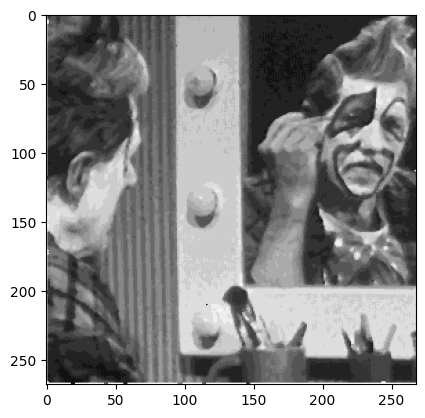

In [19]:
filtered_img = cv2.medianBlur(sp_noisy_img, 3)  # Use a 3x3 kernel
plt.imshow(filtered_img, cmap='gray', vmin=0, vmax=255)
plt.show()

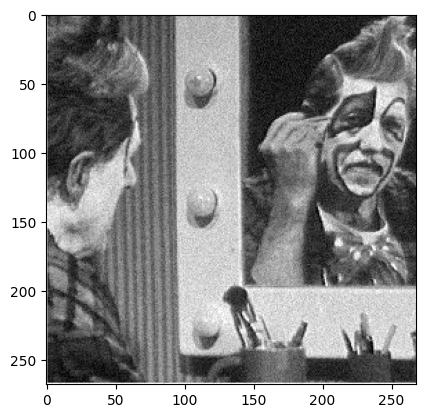

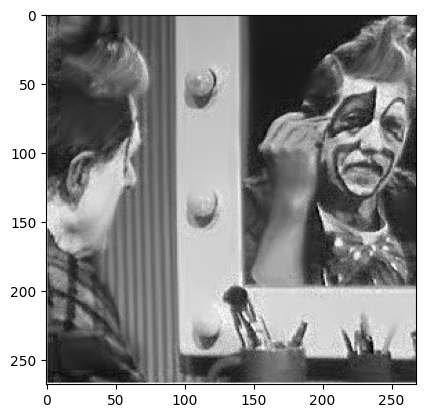

In [43]:
filtered_NLM = cv2.fastNlMeansDenoising(noisy_img,10,13,21)  # Use a 3x3 kernel
plt.imshow(noisy_img, cmap='gray', vmin=0, vmax=255)
plt.show()
plt.imshow(filtered_NLM, cmap='gray', vmin=0, vmax=255)
plt.show()

Modification of the code to create a really noisy image from MFNET dataset

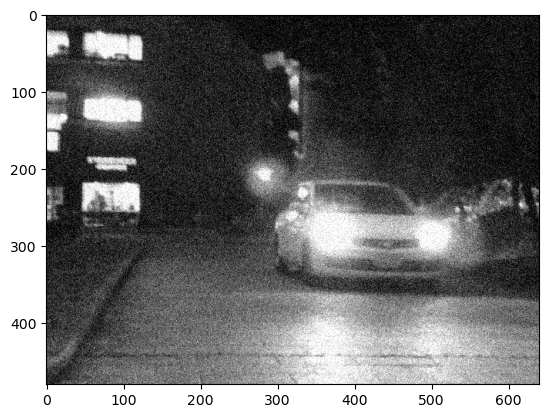

True

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread("LabSession3Images/00010N.png", cv2.IMREAD_GRAYSCALE)
row, col= img.shape
sigma_noise=25.0
gaussian = np.random.normal(0, sigma_noise, (row, col))
noisy_img = img + gaussian
noisy_img=np.clip(noisy_img, 0, 255).astype(np.uint8)
plt.imshow(noisy_img, cmap='gray', vmin=0, vmax=255)
plt.show()
cv2.imwrite("LabSession3Images/00010N_noisy.png",noisy_img)

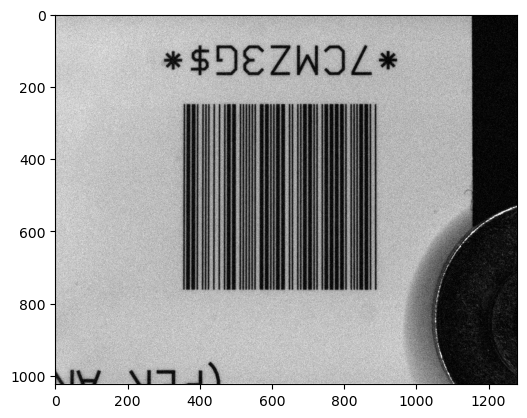

True

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread("ex/C39_4.4UP.BMP", cv2.IMREAD_GRAYSCALE)
row, col= img.shape
sigma_noise=20.0
gaussian = np.random.normal(0, sigma_noise, (row, col))
noisy_img = img + gaussian
noisy_img=np.clip(noisy_img, 0, 255).astype(np.uint8)
plt.imshow(noisy_img, cmap='gray', vmin=0, vmax=255)
plt.show()
cv2.imwrite("ex/noise_1.png",noisy_img)

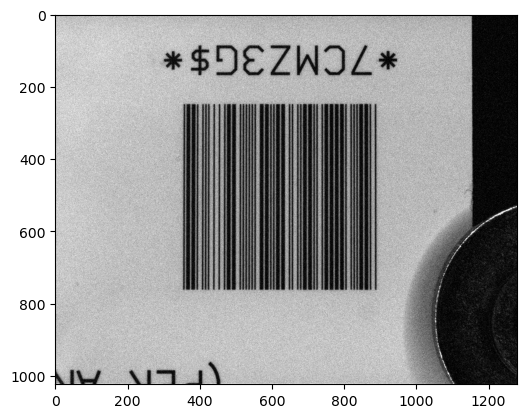

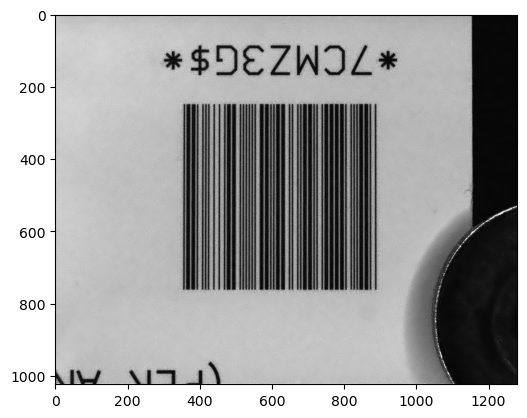

In [15]:
filtered_NLM = cv2.fastNlMeansDenoising(noisy_img,10,13,21)  # Use a 3x3 kernel
plt.imshow(noisy_img, cmap='gray', vmin=0, vmax=255)
plt.show()
plt.imshow(filtered_NLM, cmap='gray', vmin=0, vmax=255)
plt.show()

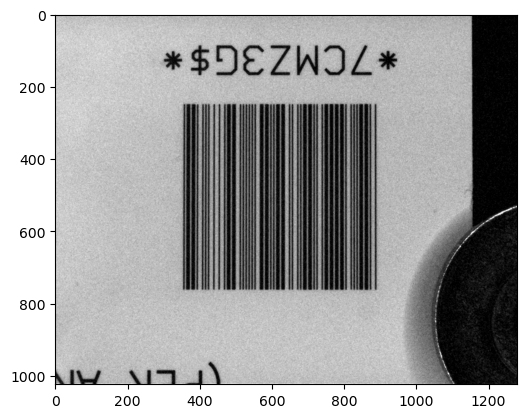

In [16]:
filtered_img = cv2.medianBlur(noisy_img, 3)  # Use a 3x3 kernel
plt.imshow(filtered_img, cmap='gray', vmin=0, vmax=255)
plt.show()

In [17]:
def add_sp_noise(image, noise_ratio):
    noisy_image = np.copy(image)

    num_noisy_pixels = int(image.size * noise_ratio)

    # Randomly choose pixel indices for salt and pepper noise.
    coords = [np.random.randint(0, i, num_noisy_pixels) for i in image.shape[:2]]

    # Assign half to white (salt) and half to black (pepper).
    noisy_image[coords[0][:num_noisy_pixels // 2], coords[1][:num_noisy_pixels // 2]] = 255
    noisy_image[coords[0][num_noisy_pixels // 2:], coords[1][num_noisy_pixels // 2:]] = 0

    return noisy_image

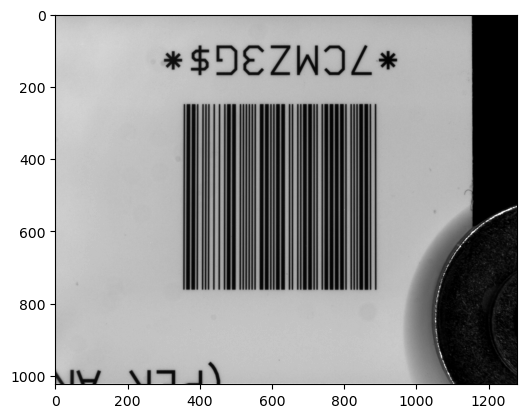

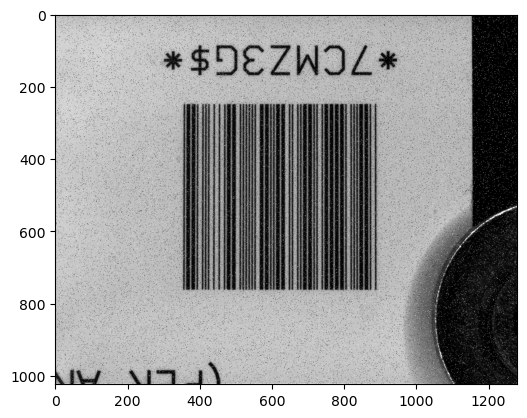

True

In [19]:
img = cv2.imread("ex/C39_4.4UP.BMP", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()
img.shape
sp_noisy_img = add_sp_noise(img, 0.05)# Corrupt 5% of the pixels.
plt.imshow(sp_noisy_img, cmap='gray', vmin=0, vmax=255)
plt.show()
cv2.imwrite("ex/noise_2.png",sp_noisy_img)

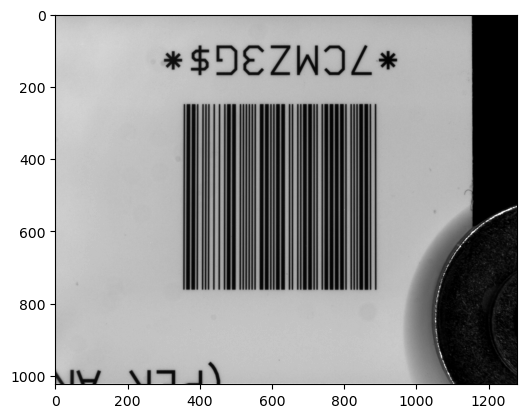

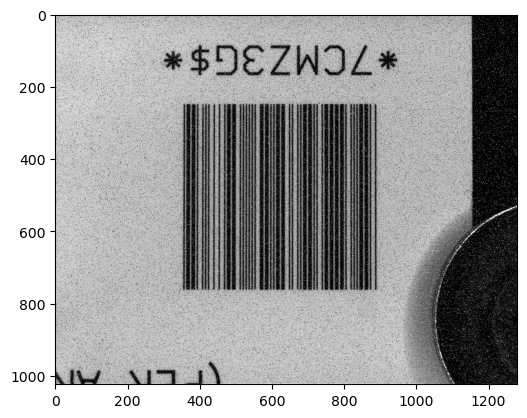

True

In [35]:
img = cv2.imread("ex/original_image.BMP", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()
img.shape
sp_noisy_img = add_sp_noise(img, 0.07)# Corrupt 5% of the pixels.
row, col= img.shape
sigma_noise=10.0
gaussian = np.random.normal(0, sigma_noise, (row, col))
noisy_img3 = sp_noisy_img + gaussian
noisy_img3=np.clip(noisy_img3, 0, 255).astype(np.uint8)
plt.imshow(noisy_img3, cmap='gray', vmin=0, vmax=255)
plt.show()
cv2.imwrite("ex/noise_3.png",noisy_img3)

In [34]:
psnr = cv2.PSNR(img, noisy_img3)
print(f"This is the PSNR of the original image wrt filtered one {psnr} db")

This is the PSNR of the original image wrt filtered one 16.33456556252977 db
